# 6.1.4 Generate Random Latitudes and Longitudes

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# 6.1.5: Generate Random World Cities

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

625

# 6.2.6: Get the City Weather Data

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4207db3a377792eb24c750378dd88d03


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4207db3a377792eb24c750378dd88d03&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

Beginning Data Retrieval     
-----------------------------


In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 26 of Set 25 | bredasdorp
Processing Record 27 of Set 25 | sitka
Processing Record 28 of Set 25 | hermanus
Processing Record 29 of Set 25 | vaini
Processing Record 30 of Set 25 | huarmey
Processing Record 31 of Set 25 | saskylakh
Processing Record 32 of Set 25 | belushya guba
City not found. Skipping...
Processing Record 33 of Set 25 | halalo
City not found. Skipping...
Processing Record 34 of Set 25 | punta arenas
Processing Record 35 of Set 25 | yerbogachen
Processing Record 36 of Set 25 | cape town
Processing Record 37 of Set 25 | nikolskoye
Processing Record 38 of Set 25 | castro
Processing Record 39 of Set 25 | saint-pierre
Processing Record 40 of Set 25 | moron
Processing Record 41 of Set 25 | jamestown
Processing Record 42 of Set 25 | qaanaaq
Processing Record 43 of Set 25 | puerto ayora
Processing Record 44 of Set 25 | geraldton
Processing Record 45 of Set 25 | tumannyy
City not found. Skipping...
Processing Record 46 of Set 25 | bolungarvik
City not found. Sk

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,66.20,55,28,8.05,ZA,2020-03-31 20:53:46
1,Sitka,57.05,-135.33,35.60,43,20,6.93,US,2020-03-31 20:53:46
2,Hermanus,-34.42,19.23,63.00,85,46,14.76,ZA,2020-03-31 20:53:47
3,Vaini,-21.20,-175.20,80.60,83,40,5.82,TO,2020-03-31 20:51:07
4,Huarmey,-10.07,-78.15,79.38,61,53,8.55,PE,2020-03-31 20:51:38
5,Saskylakh,71.92,114.08,-6.92,89,96,13.18,RU,2020-03-31 20:53:47
6,Punta Arenas,-53.15,-70.92,57.20,58,75,17.22,CL,2020-03-31 20:53:47
7,Yerbogachen,61.28,108.01,16.32,94,100,5.59,RU,2020-03-31 20:53:47
8,Cape Town,-33.93,18.42,64.00,77,20,20.80,ZA,2020-03-31 20:48:56
9,Nikolskoye,59.70,30.79,32.00,95,40,13.42,RU,2020-03-31 20:51:06


In [16]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2020-03-31 20:53:46,-34.53,20.04,66.20,55,28,8.05
1,Sitka,US,2020-03-31 20:53:46,57.05,-135.33,35.60,43,20,6.93
2,Hermanus,ZA,2020-03-31 20:53:47,-34.42,19.23,63.00,85,46,14.76
3,Vaini,TO,2020-03-31 20:51:07,-21.20,-175.20,80.60,83,40,5.82
4,Huarmey,PE,2020-03-31 20:51:38,-10.07,-78.15,79.38,61,53,8.55
...,...,...,...,...,...,...,...,...,...
565,Japura,ID,2020-03-31 20:55:20,-0.32,102.35,74.86,97,100,1.25
566,Mahon,ES,2020-03-31 20:50:57,39.89,4.27,55.40,87,40,19.46
567,Parelhas,BR,2020-03-31 20:52:07,-6.69,-36.66,80.87,64,68,13.94
568,Tutoia,BR,2020-03-31 20:52:06,-2.76,-42.27,86.00,79,40,8.05


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1: Plot Latitude vs. Temperature

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time

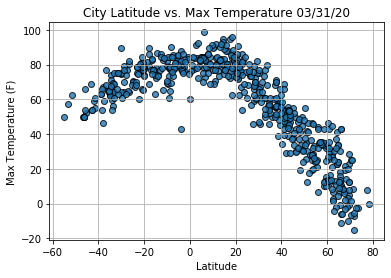

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

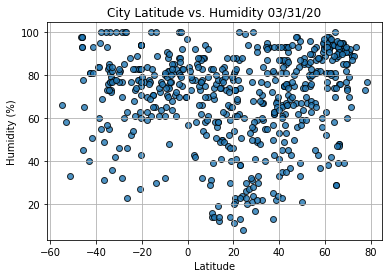

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3: Plot Latitude vs. Cloudiness

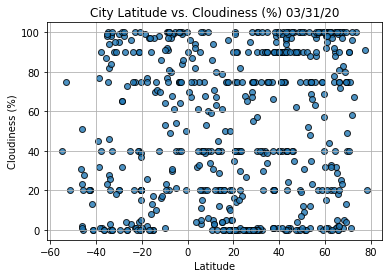

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()